In [697]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [698]:
train = np.loadtxt('C:/Users/HP/Downloads/lectures-master/lectures-master/002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('C:/Users/HP/Downloads/lectures-master/lectures-master/002/data/digit/test.csv', delimiter=',', skiprows=1)

In [699]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [700]:
train_img.shape

(42000, 28, 28)

In [701]:
test_img.shape

(28000, 28, 28)

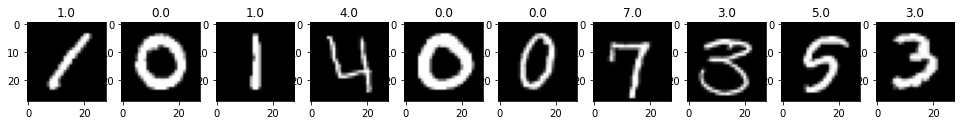

In [702]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:10], 1):
    subplot = fig.add_subplot(1, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [703]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [704]:
y = train_label
X = train_img.reshape(-1, 28 * 28).astype(np.float32)

In [705]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [706]:
#X_train = X_train.reset_index(drop=True)
#X_test = X_test.reset_index(drop=True)
#Y_train = Y_train.reset_index(drop=True)
#Y_test = Y_test.reset_index(drop=True)


In [707]:
# центрируем данные
X_mean = X_train.mean(axis=0)
X_train -= X_mean

In [708]:
# матрица ковариации признаков
cov = np.dot(X_train.T, X_train) / X_train.shape[0]

In [709]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

In [710]:
U.shape

(784, 784)

In [711]:
S.shape

(784,)

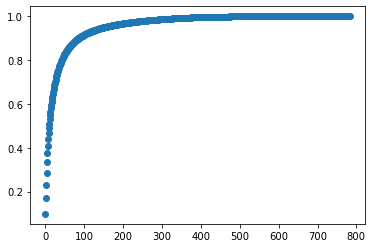

In [712]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [713]:
S_thr = 0.8  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=42 S=0.800


In [714]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X_train, U[:, :n_comp])

In [715]:
Xrot_reduced.shape

(33600, 42)

In [716]:
Xrot_reduced

array([[-135.83875 ,  294.5922  ,  213.2496  , ...,    6.50251 ,
         -96.32264 ,   76.2314  ],
       [-227.60538 , -600.05804 , -558.36584 , ...,   21.168304,
        -124.2826  ,   29.312485],
       [ 781.7704  ,  357.49634 ,  610.01654 , ...,  236.65082 ,
          78.17095 ,  210.27031 ],
       ...,
       [ 321.96176 , -733.82526 ,  -26.448532, ...,  -62.275463,
         -57.017048, -120.47512 ],
       [ -79.51184 , -569.5942  , -550.0959  , ...,   42.24626 ,
        -150.36205 ,  113.40636 ],
       [ 764.33203 , 1032.5632  , -470.069   , ..., -154.88441 ,
         157.28629 ,  158.77454 ]], dtype=float32)

In [717]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [718]:
tree_model = RandomForestClassifier(max_depth=20,n_estimators=200,random_state=0)

In [719]:
tree_model.fit(Xrot_reduced, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [720]:
Y_predict_1 = tree_model.predict(Xrot_reduced)


In [721]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(Y_train, Y_predict_1))


Accuracy: 0.9999702380952381


In [722]:
Y_train

array([3., 7., 0., ..., 4., 7., 3.])

In [723]:
Y_predict_1

array([3., 7., 0., ..., 4., 7., 3.])

In [724]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_predict_1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3326
         1.0       1.00      1.00      1.00      3747
         2.0       1.00      1.00      1.00      3353
         3.0       1.00      1.00      1.00      3453
         4.0       1.00      1.00      1.00      3270
         5.0       1.00      1.00      1.00      3044
         6.0       1.00      1.00      1.00      3321
         7.0       1.00      1.00      1.00      3498
         8.0       1.00      1.00      1.00      3290
         9.0       1.00      1.00      1.00      3298

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600



In [725]:
X_test_reduced = np.dot(X_test, U[:, :n_comp])

In [726]:
Y_test_predict_1 = tree_model.predict(X_test_reduced)


In [727]:
print('Accuracy: %s' % accuracy_score(Y_test, Y_test_predict_1))


Accuracy: 0.7614285714285715


In [728]:
print(classification_report(Y_test, Y_test_predict_1))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       806
         1.0       1.00      0.16      0.28       937
         2.0       0.93      0.78      0.85       824
         3.0       0.82      0.90      0.86       898
         4.0       0.98      0.70      0.82       802
         5.0       0.95      0.60      0.74       751
         6.0       0.98      0.83      0.90       816
         7.0       0.92      0.89      0.90       903
         8.0       0.36      0.97      0.52       773
         9.0       0.80      0.87      0.84       890

    accuracy                           0.76      8400
   macro avg       0.86      0.77      0.76      8400
weighted avg       0.86      0.76      0.76      8400



In [729]:
Y_test

array([3., 5., 1., ..., 8., 3., 0.])

In [730]:
Y_test_predict_1

array([3., 5., 8., ..., 8., 3., 0.])

In [731]:
X_test_imd = test_img.reshape(-1, 28 * 28).astype(np.float32)

In [732]:
X_test_imd_reduced = np.dot(X_test_imd, U[:, :n_comp])

In [733]:
Y_predict_test = tree_model.predict(X_test_imd_reduced)

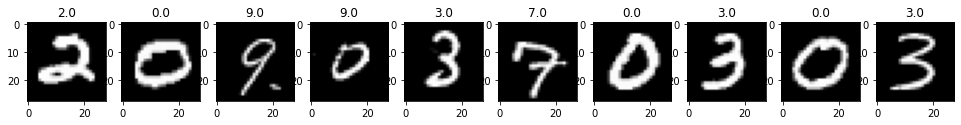

In [734]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % Y_predict_test[i - 1]);

In [735]:
Y_predict_test

array([2., 0., 9., ..., 3., 9., 2.])

In [736]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(Y_predict_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [737]:
!head submit.txt

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
